## **1. 📦 Core Indicator Themes & Timing**

| Theme               | Indicator                                      | Timing     |
|---------------------|---------------------------------------------------------------------|------------|
| **Confidence**       | Consumer Confidence                            | Leading    |
|                     | Business Confidence                            | Leading    |
| **Labor Market**     | Total Jobs                                     | Coincident |
|                     | Unemployment Rate                              | Lagging    |
|                     | Labor Force Participation                      | Coincident |
| **Inflation**        | Consumer Price Index (CPI)                     | Lagging    |
|                     | Producer Price Index (PPI)                     | Leading    |
|                     | Crude Oil Prices                                | Leading    |
| **Interest Rates**   | Fed Funds Rate                                 | Lagging    |
|                     | Baa-Aaa Treasury Constant Maturity Rate        | Mixed      |
| **Real Economy**     | Housing Starts                                 | Leading    |
|                     | Durable Goods Orders                           | Leading    |
|                     | Capacity Utilization                           | Coincident |
| **Production**       | Industrial Production                          | Coincident |
| **Fiscal & Credit**  | Deficit as % of GDP                            | Lagging    |
|                     | Baa-Aaa Corporate Bond Yield                   | Lagging    |
|                     | Credit Conditions Subindex                      | Lagging    |
| **Liquidity**        | Real M2 Stocks                                 | Lagging    |
| **Sales/Inventory**  | Business Inventories                           | Lagging    |
|                     | Retail Sales                                   | Coincident |
| **Volatility**       | VIX (Volatility Index)                         | Leading    |

### All our Datasets

In [2328]:
import pandas as pd
import sqlite3

# Load CSV files into DataFrames
BCI_df = pd.read_csv('Leading/Business_Confidence_Index.csv')
CCI_df = pd.read_csv('Leading/Consumer_Confidence_Index.csv')
Credit_Conditions_df = pd.read_csv('Leading/Credit_Conditions.csv')
Oil_Prices_df = pd.read_csv('Leading/Crude_Oil_Prices.csv')
Housing_Starts_df = pd.read_csv('Leading/Housing_Starts.csv')
Jobless_Claims_df = pd.read_csv('Leading/Initial_Claims.csv')
Volatility_Index_df = pd.read_csv('Leading/Volatility_Index.csv')


# ---------------------------------------------------
# 🗃️ Load DataFrames into an SQLite in-memory database
# ---------------------------------------------------
conn = sqlite3.connect(':memory:')

BCI_df.to_sql('BusinessConfidence', conn, index=False, if_exists='replace')
CCI_df.to_sql('ConsumerConfidence', conn, index=False, if_exists='replace')
Credit_Conditions_df.to_sql('CreditConditions', conn, index=False, if_exists='replace')
Oil_Prices_df.to_sql('OilPrices', conn, index=False, if_exists='replace')
Housing_Starts_df.to_sql('HousingStarts', conn, index=False, if_exists='replace')
Jobless_Claims_df.to_sql('JoblessClaims', conn, index=False, if_exists='replace')
Volatility_Index_df.to_sql('Volatility', conn, index=False, if_exists='replace')



# ---------------------------
# 📊 SQL Query to Join Tables
# ---------------------------
sql_query = """
SELECT *
FROM JoblessClaims
LEFT JOIN BusinessConfidence ON JoblessClaims.observation_date = BusinessConfidence.observation_date
LEFT JOIN ConsumerConfidence ON JoblessClaims.observation_date = ConsumerConfidence.observation_date
LEFT JOIN CreditConditions ON JoblessClaims.observation_date = CreditConditions.observation_date
LEFT JOIN OilPrices ON JoblessClaims.observation_date = OilPrices.observation_date
LEFT JOIN HousingStarts ON JoblessClaims.observation_date = HousingStarts.observation_date
LEFT JOIN Volatility ON JoblessClaims.observation_date = Volatility.observation_date

WHERE JoblessClaims.observation_date >= '1970-01-01'
"""

# Execute the query and load results into a DataFrame
Leading_Indicators_df = pd.read_sql_query(sql_query, conn)

# Save the merged DataFrame to a new CSV file
csv_filename = "Leading/Leading_Indicators_df.csv"
Leading_Indicators_df.to_csv(csv_filename, index=False)

# Close the connection
conn.close()

# Output the final DataFrame
Leading_Indicators_df

,observation_date,Jobless_Claims,observation_date,Business_Confidence_Index,observation_date,Consumer_Confidence_Index,observation_date,Credit_Conditions_Subindex,observation_date,Crude_Oil_Prices,observation_date,Housing_Starts,observation_date,Volatility_Index
0,1970-01-01,257077,1970-01-01,-2.6,1970-01-01,78.639130,None,NaN,1970-01-01,3.35,1970-01-01,1085,None,NaN
1,1970-04-01,310692,1970-04-01,-10.0,1970-04-01,76.310112,None,NaN,1970-04-01,3.35,1970-04-01,1264,None,NaN
2,1970-07-01,295923,1970-07-01,-1.0,1970-07-01,76.858696,None,NaN,1970-07-01,3.31,1970-07-01,1517,None,NaN
3,1970-10-01,322538,1970-10-01,-15.2,1970-10-01,74.152174,None,NaN,1970-10-01,3.31,1970-10-01,1580,None,NaN
4,1971-01-01,292692,1971-01-01,-4.2,1971-01-01,76.179348,1971-01-01,-1.15617,1971-01-01,3.56,1971-01-01,1828,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,2024-01-01,212154,2024-01-01,-1.8,2024-01-01,79.000000,2024-01-01,-0.01606,2024-01-01,74.15,2024-01-01,1376,2024-01-01,13.71
217,2024-04-01,223615,2024-04-01,-2.4,2024-04-01,77.200000,2024-04-01,-0.04506,2024-04-01,85.35,2024-04-01,1377,2024-04-01,13.98
218,2024-07-01,230769,2024-07-01,-6.0,2024-07-01,66.400000,2024-07-01,-0.03644,2024-07-01,81.80,2024-07-01,1262,2024-07-01,17.07
219,2024-10-01,225462,2024-10-01,-6.2,2024-10-01,70.500000,2024-10-01,-0.08510,2024-10-01,71.99,2024-10-01,1344,2024-10-01,17.36


In [2329]:
import pandas as pd
import sqlite3

# Load CSV files into DataFrames
Treasury_Maturity_df = pd.read_csv('Lagging/10Y_2Y_Treasury_Constant_Maturity.csv')
Corporate_Bonds_df = pd.read_csv('Lagging/Baa_Aaa_Corporate_Bond_Yield.csv')
CPI_Inflation_df = pd.read_csv('Lagging/CPI_Inflation_Rate.csv')
Deficit_GDP_df = pd.read_csv('Lagging/Deficit_of_GDP.csv')
Durable_Goods_df = pd.read_csv('Lagging/Durable_Goods.csv')
Interest_Rates_df = pd.read_csv('Lagging/Interest_Rates.csv')
PPI_Inflation_df = pd.read_csv('Lagging/PPI_Inflation_Rate.csv')
Real_GDP_df = pd.read_csv('Lagging/Real_Gross_Domestic_Product.csv')
Real_M2_Stocks_df = pd.read_csv('Lagging/Real_M2_Stocks.csv')
Business_Inventories_df = pd.read_csv('Lagging/Total_Business_Inventories.csv')
Unemployment_Rate_df = pd.read_csv('Lagging/Unemployment_Rate.csv')


# Set up in-memory SQLite connection
conn = sqlite3.connect(':memory:')

# Load data into SQL tables
Treasury_Maturity_df.to_sql('TreasuryMaturity', conn, index=False, if_exists='replace')
Corporate_Bonds_df.to_sql('CorporateYield', conn, index=False, if_exists='replace')
CPI_Inflation_df.to_sql('CPI', conn, index=False, if_exists='replace')
Deficit_GDP_df.to_sql('DeficitGDP', conn, index=False, if_exists='replace')
Durable_Goods_df.to_sql('DurableGoods', conn, index=False, if_exists='replace')
Interest_Rates_df.to_sql('InterestRates', conn, index=False, if_exists='replace')
PPI_Inflation_df.to_sql('PPI', conn, index=False, if_exists='replace')
Real_GDP_df.to_sql('GDP', conn, index=False, if_exists='replace')
Real_M2_Stocks_df.to_sql('M2_Stocks', conn, index=False, if_exists='replace')
Business_Inventories_df.to_sql('Inventories', conn, index=False, if_exists='replace')
Unemployment_Rate_df.to_sql('Unemployment', conn, index=False, if_exists='replace')



# SQL query to join all lagging indicator tables on observation_date
sql_query = """
SELECT *
FROM InterestRates
LEFT JOIN TreasuryMaturity ON InterestRates.observation_date = TreasuryMaturity.observation_date
LEFT JOIN CorporateYield ON InterestRates.observation_date = CorporateYield.observation_date
LEFT JOIN CPI ON InterestRates.observation_date = CPI.observation_date
LEFT JOIN DeficitGDP ON InterestRates.observation_date = DeficitGDP.observation_date
LEFT JOIN DurableGoods ON InterestRates.observation_date = DurableGoods.observation_date
LEFT JOIN GDP ON InterestRates.observation_date = GDP.observation_date
LEFT JOIN PPI ON InterestRates.observation_date = PPI.observation_date
LEFT JOIN M2_Stocks ON InterestRates.observation_date = M2_Stocks.observation_date
LEFT JOIN Inventories ON InterestRates.observation_date = Inventories.observation_date
LEFT JOIN Unemployment ON InterestRates.observation_date = Unemployment.observation_date

WHERE InterestRates.observation_date >= '1967-01-01'
"""

# Execute query and load result into DataFrame
Lagging_Indicators_df = pd.read_sql_query(sql_query, conn)

# Save to CSV
Lagging_Indicators_df.to_csv("Lagging/Lagging_Indicators_df.csv", index=False)

# Close the database connection
conn.close()

# Display the final joined DataFrame
Lagging_Indicators_df

,observation_date,Interest_Rates,observation_date,10Y_minus_2Y_Treasury_Constant_Maturity,observation_date,Corporate_Bond_Yield,observation_date,CPI,observation_date,Deficit_%_GDP,...,observation_date,GDP,observation_date,PPI,observation_date,M2_Money_Stocks,observation_date,Business_Inventories,observation_date,Unemployment_Rate
0,1967-01-01,4.82,None,NaN,None,None,1967-01-01,1.020,None,NaN,...,1967-01-01,4870.299,1967-01-01,1.51976,1967-01-01,1463.8,None,NaN,1967-01-01,3.9
1,1967-04-01,3.99,None,NaN,None,None,1967-04-01,0.820,None,NaN,...,1967-04-01,4873.287,1967-04-01,-0.30120,1967-04-01,1486.7,None,NaN,1967-04-01,3.8
2,1967-07-01,3.89,None,NaN,None,None,1967-07-01,0.950,None,NaN,...,1967-07-01,4919.392,1967-07-01,0.00000,1967-07-01,1515.9,None,NaN,1967-07-01,3.8
3,1967-10-01,4.17,None,NaN,None,None,1967-10-01,0.850,None,NaN,...,1967-10-01,4956.477,1967-10-01,0.00000,1967-10-01,1537.7,None,NaN,1967-10-01,4.0
4,1968-01-01,4.79,None,NaN,None,None,1968-01-01,1.200,None,NaN,...,1968-01-01,5057.553,1968-01-01,1.19760,1968-01-01,1546.6,None,NaN,1968-01-01,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,2024-01-01,5.33,2024-01-01,-0.26,None,None,2024-01-01,9.338,2024-01-01,-6.28002,...,2024-01-01,23053.545,2024-01-01,-3.42816,2024-01-01,6705.5,2024-01-01,2533439.0,2024-01-01,3.7
229,2024-04-01,5.33,2024-04-01,-0.33,None,None,2024-04-01,10.158,None,NaN,...,2024-04-01,23223.906,2024-04-01,0.02725,2024-04-01,6687.5,2024-04-01,2546223.0,2024-04-01,3.9
230,2024-07-01,5.26,2024-07-01,-0.25,None,None,2024-07-01,8.951,None,NaN,...,2024-07-01,23400.294,2024-07-01,1.37333,2024-07-01,6728.5,2024-07-01,2574892.0,2024-07-01,4.2
231,2024-10-01,4.65,2024-10-01,0.12,None,None,2024-10-01,7.911,None,NaN,...,2024-10-01,23542.349,2024-10-01,-0.82722,2024-10-01,6761.1,2024-10-01,2585582.0,2024-10-01,4.1


In [2330]:
import pandas as pd
import sqlite3

# Load CSV files into DataFrames
Capacity_df = pd.read_csv('Coincident/Capacity_Utilization_Index.csv')
Industrial_Production_df = pd.read_csv('Coincident/Industrial_Production_Index.csv')
Labor_Force_Participation_df = pd.read_csv('Coincident/Labor_Force_Participation.csv')
Retail_Sales_df = pd.read_csv('Coincident/Retail_Sales.csv')
Total_Jobs_df = pd.read_csv('Coincident/Total_Jobs.csv')


# ---------------------------------------------------
# 🗃️ Load DataFrames into an SQLite in-memory database
# ---------------------------------------------------
conn = sqlite3.connect(':memory:')

Capacity_df.to_sql('Capacity', conn, index=False, if_exists='replace')
Industrial_Production_df.to_sql('IndProd', conn, index=False, if_exists='replace')
Labor_Force_Participation_df.to_sql('LaborForce', conn, index=False, if_exists='replace')
Retail_Sales_df.to_sql('RetailSales', conn, index=False, if_exists='replace')
Total_Jobs_df.to_sql('Jobs', conn, index=False, if_exists='replace')


# ---------------------------
# 📊 SQL Query to Join Tables
# ---------------------------
sql_query = """
SELECT *
FROM Capacity
LEFT JOIN IndProd ON Capacity.observation_date = IndProd.observation_date
LEFT JOIN LaborForce ON Capacity.observation_date = LaborForce.observation_date
LEFT JOIN RetailSales ON Capacity.observation_date = RetailSales.observation_date
LEFT JOIN Jobs ON Capacity.observation_date = Jobs.observation_date 
WHERE Capacity.observation_date >= '1967-01-01'
"""

# Execute the query and load results into a DataFrame
Coincident_Indicators_df = pd.read_sql_query(sql_query, conn)

# Save the merged DataFrame to a new CSV file
csv_filename = "Coincident/Coincident_Indicators_df.csv"
Coincident_Indicators_df.to_csv(csv_filename, index=False)

# Close the connection
conn.close()

# Provide the final DataFrame
Coincident_Indicators_df

,observation_date,Capacity_Utilization_Rate,observation_date,Industrial_Production_Index,observation_date,Labor_Force_Participation,observation_date,Total_Retail_Sales,observation_date,Total_Jobs
0,1967-01-01,88.1496,1967-01-01,35.1638,1967-01-01,59.5,None,NaN,1967-01-01,65407
1,1967-04-01,86.6086,1967-04-01,34.8951,1967-04-01,59.4,None,NaN,1967-04-01,65466
2,1967-07-01,86.0431,1967-07-01,34.5076,1967-07-01,59.6,None,NaN,1967-07-01,65888
3,1967-10-01,87.1866,1967-10-01,35.3976,1967-10-01,59.9,None,NaN,1967-10-01,66225
4,1968-01-01,87.3375,1968-01-01,36.2514,1968-01-01,59.2,None,NaN,1968-01-01,66804
...,...,...,...,...,...,...,...,...,...,...
227,2023-10-01,78.2766,2023-10-01,102.5781,2023-10-01,62.7,2023-10-01,227323.0,2023-10-01,156520
228,2024-01-01,77.7036,2024-01-01,101.4830,2024-01-01,62.5,2024-01-01,224062.0,2024-01-01,157049
229,2024-04-01,77.9731,2024-04-01,102.3568,2024-04-01,62.7,2024-04-01,224487.0,2024-04-01,157635
230,2024-07-01,77.6310,2024-07-01,102.5192,2024-07-01,62.7,2024-07-01,226699.0,2024-07-01,158003


In [2331]:
import pandas as pd
import sqlite3

# Load CSV files into DataFrames
Capacity_df = pd.read_csv('Coincident/Capacity_Utilization_Index.csv')
Industrial_Production_df = pd.read_csv('Coincident/Industrial_Production_Index.csv')
Labor_Force_Participation_df = pd.read_csv('Coincident/Labor_Force_Participation.csv')

Total_Jobs_df = pd.read_csv('Coincident/Total_Jobs.csv')


# ---------------------------------------------------
# 🗃️ Load DataFrames into an SQLite in-memory database
# ---------------------------------------------------
conn = sqlite3.connect(':memory:')

Capacity_df.to_sql('Capacity', conn, index=False, if_exists='replace')
Industrial_Production_df.to_sql('IndProd', conn, index=False, if_exists='replace')
Labor_Force_Participation_df.to_sql('LaborForce', conn, index=False, if_exists='replace')
Retail_Sales_df.to_sql('RetailSales', conn, index=False, if_exists='replace')
Total_Jobs_df.to_sql('Jobs', conn, index=False, if_exists='replace')


# ---------------------------
# 📊 SQL Query to Join Tables
# ---------------------------
sql_query = """
SELECT *
FROM Capacity
LEFT JOIN IndProd ON Capacity.observation_date = IndProd.observation_date
LEFT JOIN LaborForce ON Capacity.observation_date = LaborForce.observation_date
LEFT JOIN RetailSales ON Capacity.observation_date = RetailSales.observation_date
LEFT JOIN Jobs ON Capacity.observation_date = Jobs.observation_date 
WHERE Capacity.observation_date >= '1967-01-01'
"""

# Execute the query and load results into a DataFrame
Coincident_Indicators_df = pd.read_sql_query(sql_query, conn)

# Save the merged DataFrame to a new CSV file
csv_filename = "Coincident/Coincident_Indicators_df.csv"
Coincident_Indicators_df.to_csv(csv_filename, index=False)

# Close the connection
conn.close()

# Provide the final DataFrame
Coincident_Indicators_df

,observation_date,Capacity_Utilization_Rate,observation_date,Industrial_Production_Index,observation_date,Labor_Force_Participation,observation_date,Total_Retail_Sales,observation_date,Total_Jobs
0,1967-01-01,88.1496,1967-01-01,35.1638,1967-01-01,59.5,None,NaN,1967-01-01,65407
1,1967-04-01,86.6086,1967-04-01,34.8951,1967-04-01,59.4,None,NaN,1967-04-01,65466
2,1967-07-01,86.0431,1967-07-01,34.5076,1967-07-01,59.6,None,NaN,1967-07-01,65888
3,1967-10-01,87.1866,1967-10-01,35.3976,1967-10-01,59.9,None,NaN,1967-10-01,66225
4,1968-01-01,87.3375,1968-01-01,36.2514,1968-01-01,59.2,None,NaN,1968-01-01,66804
...,...,...,...,...,...,...,...,...,...,...
227,2023-10-01,78.2766,2023-10-01,102.5781,2023-10-01,62.7,2023-10-01,227323.0,2023-10-01,156520
228,2024-01-01,77.7036,2024-01-01,101.4830,2024-01-01,62.5,2024-01-01,224062.0,2024-01-01,157049
229,2024-04-01,77.9731,2024-04-01,102.3568,2024-04-01,62.7,2024-04-01,224487.0,2024-04-01,157635
230,2024-07-01,77.6310,2024-07-01,102.5192,2024-07-01,62.7,2024-07-01,226699.0,2024-07-01,158003


In [2363]:
import pandas as pd
import sqlite3



Total_Jobs_Added_df= pd.read_csv('Coincident/Total_Jobs.csv')
Total_Jobs_Added_df['Jobs_Added'] = Total_Jobs_Added_df['Total_Jobs'].diff()
Total_Jobs_Added_df

Unemployment_Rate_Change_df = pd.read_csv('Lagging/Unemployment_Rate.csv')
Unemployment_Rate_Change_df['Unemployment_Rate_Change'] = Unemployment_Rate_Change_df['Unemployment_Rate'].diff()
Unemployment_Rate_Change_df

Real_GDP_Growth_Rate_df = pd.read_csv('Lagging/Real_Gross_Domestic_Product.csv')
Real_GDP_Growth_Rate_df['GDP_Growth_Rate'] = Real_GDP_Growth_Rate_df['GDP'].pct_change()*100
Real_GDP_Growth_Rate_df

Industrial_Production_Growth_Rate_df = pd.read_csv('Coincident/Industrial_Production_Index.csv')
Industrial_Production_Growth_Rate_df['Industrial_Production_Growth'] = Industrial_Production_Growth_Rate_df['Industrial_Production_Index'].pct_change()*100
Industrial_Production_Growth_Rate_df

Treasury_Maturity_df = pd.read_csv('Lagging/10Y_2Y_Treasury_Constant_Maturity.csv')
Treasury_Maturity_df['Constant_Maturity_Growth'] = Treasury_Maturity_df['10Y_minus_2Y_Treasury_Constant_Maturity'].diff()

CCI_df = pd.read_csv('Leading/Consumer_Confidence_Index.csv')
CCI_df['CCI_growth_rate'] = CCI_df['Consumer_Confidence_Index'].pct_change()*100


NBER_df = pd.read_csv('USREC.csv')

# ---------------------------
# 📊 SQL Query to Join Tables
# ---------------------------

conn = sqlite3.connect(':memory:')

Total_Jobs_Added_df.to_sql('Jobs', conn, index=False, if_exists='replace')
Unemployment_Rate_Change_df.to_sql('Unemployment', conn, index=False, if_exists='replace')
Real_GDP_Growth_Rate_df.to_sql('GDP', conn, index=False, if_exists='replace')
Industrial_Production_Growth_Rate_df.to_sql('IndProd', conn, index=False, if_exists='replace')
Treasury_Maturity_df.to_sql('Treasury', conn, index=False, if_exists='replace')
CCI_df.to_sql('CCI', conn, index=False, if_exists='replace')



sql_query = """
SELECT GDP.observation_date, GDP_Growth_Rate, Unemployment_Rate_Change, Jobs_Added, Industrial_Production_Growth, Constant_Maturity_Growth, CCI_Growth_Rate
FROM GDP
LEFT JOIN Unemployment ON GDP.observation_date = Unemployment.observation_date
LEFT JOIN Jobs ON GDP.observation_date = Jobs.observation_date
LEFT JOIN IndProd ON GDP.observation_date = IndProd.observation_date
LEFT JOIN Treasury ON GDP.observation_date = Treasury.observation_date
LEFT JOIN CCI ON GDP.observation_date = CCI.observation_date
WHERE GDP.observation_date >= '1976-10-01'
"""

# Execute the query and load results into a DataFrame
Prediction_Indicators_df = pd.read_sql_query(sql_query, conn)

# Save the merged DataFrame to a new CSV file
csv_filename = "Prediction_Indicators.csv"
Prediction_Indicators_df.to_csv(csv_filename, index=False)

# Close the connection
conn.close()

# Provide the final DataFrame
Prediction_Indicators_df

,observation_date,GDP_Growth_Rate,Unemployment_Rate_Change,Jobs_Added,Industrial_Production_Growth,Constant_Maturity_Growth,CCI_growth_rate
0,1976-10-01,0.722604,0.1,19.0,-0.024904,0.25,-0.991590
1,1977-01-01,1.186233,-0.3,242.0,-0.689685,-0.18,0.038716
2,1977-04-01,1.941924,-0.2,337.0,0.976329,0.04,1.225969
3,1977-07-01,1.803165,-0.3,346.0,0.135890,-0.09,-0.435772
4,1977-10-01,0.001993,0.0,268.0,0.153911,-0.21,-1.715266
...,...,...,...,...,...,...,...
188,2023-10-01,0.788673,0.1,186.0,-0.706624,0.37,-5.899705
189,2024-01-01,0.404802,-0.1,119.0,-1.118474,0.18,13.342898
190,2024-04-01,0.738980,0.0,118.0,-0.157825,0.05,-2.770781
191,2024-07-01,0.759510,0.1,88.0,-0.711066,0.18,-2.639296


## 3. Regime Definition & Labeling


### 📊 Columns in Your Dataset:

From your dataset, we'll base the classification on:

- `GDP_Growth_Rate`
- `Unemployment_Rate_Change`
- `Jobs_Added`
- `CPI`
- `Interest_Rate`
- `Industrial_Production_Growth`

---

---

In [2365]:
def classify_regime(row):
    gdp = row['GDP_Growth_Rate']
    unemp = row['Unemployment_Rate_Change']
    jobs = row['Jobs_Added']
    prod = row['Industrial_Production_Growth']
    treasury = row['Constant_Maturity_Growth']  # 10Y - 2Y spread or similar
    CCI = row['CCI_growth_rate']

    # Recession scoring
    recession_score = 0
    recession_score += 3 if gdp < 0.5 else 0
    recession_score += 2 if unemp > 0.3 else 0
    recession_score += 3 if jobs < -75_000 else 0
    recession_score += 2 if prod < -0.3 else 0

    # Boom scoring
    boom_score = 0
    boom_score += 2 if gdp > 1.5 else 0
    boom_score += 2 if unemp < 0.1 else 0
    boom_score += 2 if jobs > 75_000 else 0
    boom_score += 1 if prod > 1.0 else 0

    if recession_score >= 4:
        return "Recession"
    elif boom_score >= 4:
        return "Boom"

    # Stable regime (if not recession/boom)
    stable_score = sum([
        0.7 < gdp <= 3.0,
        -0.1 <= unemp <= 0.2,
        30_000 < jobs <= 200_000,
        0.1 <= prod <= 2.2
    ])
    if stable_score >= 2 and not (prod < -0.4 and gdp < 0.8):
        return "Stable"

    # Mild is *only* when Treasury spikes > 0.6 (early warning before downturn)
    if treasury > 0.25:
        return "mild"
    elif CCI <= -0.5:
        return "mild"

    # Default fallback if none match (optional)
    return "Stable"

# Apply early warning classifier
Prediction_Indicators_df["Regime_Label"] = Prediction_Indicators_df.apply(classify_regime, axis=1)

# Return updated counts including "Recession Watch"
Prediction_Indicators_df["Regime_Label"].value_counts()
Prediction_Indicators_df

,observation_date,GDP_Growth_Rate,Unemployment_Rate_Change,Jobs_Added,Industrial_Production_Growth,Constant_Maturity_Growth,CCI_growth_rate,Regime_Label
0,1976-10-01,0.722604,0.1,19.0,-0.024904,0.25,-0.991590,Stable
1,1977-01-01,1.186233,-0.3,242.0,-0.689685,-0.18,0.038716,Stable
2,1977-04-01,1.941924,-0.2,337.0,0.976329,0.04,1.225969,Boom
3,1977-07-01,1.803165,-0.3,346.0,0.135890,-0.09,-0.435772,Boom
4,1977-10-01,0.001993,0.0,268.0,0.153911,-0.21,-1.715266,Stable
...,...,...,...,...,...,...,...,...
188,2023-10-01,0.788673,0.1,186.0,-0.706624,0.37,-5.899705,mild
189,2024-01-01,0.404802,-0.1,119.0,-1.118474,0.18,13.342898,Recession
190,2024-04-01,0.738980,0.0,118.0,-0.157825,0.05,-2.770781,Stable
191,2024-07-01,0.759510,0.1,88.0,-0.711066,0.18,-2.639296,mild


## Historic Pattern Analysis (Retro)
- Build **pre-regime-transition snapshots** (1974-75, 1980, 1981-82, 1991, 2001, 2008, 2020)  
- Identify which indicators **change earliest** before downturns or recoveries  
- Use pattern recognition to validate labeling and feature design
✅ Ensures model is grounded in historical economic transitions.


In [2334]:
import pandas as pd
import sqlite3

# Create in-memory SQLite connection
conn = sqlite3.connect(':memory:')


# Save them to the SQLite database
Prediction_Indicators_df.to_sql('Prediction_Indicator', conn, index=False, if_exists='replace')



# Proper SQL query
sql_query = """
SELECT *
FROM Prediction_Indicator
WHERE Prediction_Indicator.observation_date >= '1979-04-01'
AND Prediction_Indicator.observation_date <= '1980-04-01'
"""


# Run the query
Pre_1980_Recession = pd.read_sql_query(sql_query, conn)

# Save to CSV
csv_filename = "Recession/Pre_1980_Recession.csv"
Pre_1980_Recession.to_csv(csv_filename, index=False)

# Close DB connection
conn.close()

# Show final DataFrame
Pre_1980_Recession

,observation_date,GDP_Growth_Rate,Unemployment_Rate_Change,Jobs_Added,Industrial_Production_Growth,Constant_Maturity_Growth,Regime_Label
0,1979-04-01,0.106745,0.0,-62.0,-1.180441,0.07,Recession
1,1979-07-01,0.742805,0.0,109.0,-0.161432,0.12,Stable
2,1979-10-01,0.250045,0.1,154.0,0.691558,-0.47,Stable
3,1980-01-01,0.314571,0.3,128.0,0.531456,0.30,mild
4,1980-04-01,-2.060435,0.6,-145.0,-1.982205,1.11,Recession


In [2335]:
import pandas as pd
import sqlite3

# Create in-memory SQLite connection
conn = sqlite3.connect(':memory:')

# Save them to the SQLite database
Prediction_Indicators_df.to_sql('Prediction_Indicator', conn, index=False, if_exists='replace')

# Proper SQL query
sql_query = """
SELECT *
FROM Prediction_Indicator
WHERE Prediction_Indicator.observation_date >= '1980-07-01'
AND Prediction_Indicator.observation_date <= '1981-07-01'
"""


# Run the query
Pre_1981_Recession = pd.read_sql_query(sql_query, conn)

# Save to CSV
csv_filename = "Recession/Pre_1981_Recession.csv"
Pre_1981_Recession.to_csv(csv_filename, index=False)

# Close DB connection
conn.close()

# Show final DataFrame
Pre_1981_Recession

,observation_date,GDP_Growth_Rate,Unemployment_Rate_Change,Jobs_Added,Industrial_Production_Growth,Constant_Maturity_Growth,Regime_Label
0,1980-07-01,-0.118855,0.2,-261.0,-0.711736,0.17,Recession
1,1980-10-01,1.864923,0.0,277.0,1.270376,-0.27,Boom
2,1981-01-01,1.959422,0.3,90.0,-0.632499,0.54,mild
3,1981-04-01,-0.741076,-0.2,73.0,-0.420748,-0.02,Recession
4,1981-07-01,1.197502,-0.3,111.0,0.650995,-0.04,Stable


In [2336]:
import pandas as pd
import sqlite3

# Create in-memory SQLite connection
conn = sqlite3.connect(':memory:')

# Save them to the SQLite database
Prediction_Indicators_df.to_sql('Prediction_Indicator', conn, index=False, if_exists='replace')

# Proper SQL query
sql_query = """
SELECT *
FROM Prediction_Indicator
WHERE Prediction_Indicator.observation_date >= '1990-07-01'
AND Prediction_Indicator.observation_date <= '1991-07-01'
"""


# Run the query
Pre_1991_Recession = pd.read_sql_query(sql_query, conn)

# Save to CSV
csv_filename = "Recession/Pre_1991_Recession.csv"
Pre_1991_Recession.to_csv(csv_filename, index=False)

# Close DB connection
conn.close()

# Show final DataFrame
Pre_1991_Recession

,observation_date,GDP_Growth_Rate,Unemployment_Rate_Change,Jobs_Added,Industrial_Production_Growth,Constant_Maturity_Growth,Regime_Label
0,1990-07-01,0.066582,0.3,-35.0,-0.166380,0.18,Stable
1,1990-10-01,-0.910405,0.0,-146.0,-0.614784,0.03,Recession
2,1991-01-01,-0.467941,0.1,-110.0,-0.333341,0.21,Recession
3,1991-04-01,0.779689,-0.1,-218.0,0.257225,0.08,Stable
4,1991-07-01,0.505359,-0.1,-40.0,0.274080,0.03,Stable


In [2337]:
import pandas as pd
import sqlite3

# Create in-memory SQLite connection
conn = sqlite3.connect(':memory:')

# Save them to the SQLite database
Prediction_Indicators_df.to_sql('Prediction_Indicator', conn, index=False, if_exists='replace')

# Proper SQL query
sql_query = """
SELECT *
FROM Prediction_Indicator
WHERE Prediction_Indicator.observation_date >= '2000-04-01'
AND Prediction_Indicator.observation_date <= '2001-04-01'
"""

# Run the query
Pre_2001_Recession = pd.read_sql_query(sql_query, conn)

# Save to CSV
csv_filename = "Recession/Pre_2001_Recession.csv"
Pre_2001_Recession.to_csv(csv_filename, index=False)

# Close DB connection
conn.close()

# Show final DataFrame
Pre_2001_Recession

,observation_date,GDP_Growth_Rate,Unemployment_Rate_Change,Jobs_Added,Industrial_Production_Growth,Constant_Maturity_Growth,Regime_Label
0,2000-04-01,1.821288,-0.2,279.0,0.633016,-0.14,Boom
1,2000-07-01,0.101933,0.0,166.0,-0.176878,0.09,Stable
2,2000-10-01,0.597039,0.0,14.0,-0.368563,0.11,Stable
3,2001-01-01,-0.327799,0.3,-13.0,-0.492606,0.51,Recession
4,2001-04-01,0.624503,0.1,-294.0,-0.351532,0.37,mild


In [2338]:
import pandas as pd
import sqlite3

# Create in-memory SQLite connection
conn = sqlite3.connect(':memory:')

# Save them to the SQLite database
Prediction_Indicators_df.to_sql('Prediction_Indicator', conn, index=False, if_exists='replace')

# Proper SQL query
sql_query = """
SELECT *
FROM Prediction_Indicator
WHERE Prediction_Indicator.observation_date >= '2007-01-01'
AND Prediction_Indicator.observation_date <= '2008-01-01'
"""



# Run the query
Pre_2008_Recession = pd.read_sql_query(sql_query, conn)

# Save to CSV
csv_filename = "Recession/Pre_2008_Recession.csv"
Pre_2008_Recession.to_csv(csv_filename, index=False)

# Close DB connection
conn.close()

# Show final DataFrame
Pre_2008_Recession

,observation_date,GDP_Growth_Rate,Unemployment_Rate_Change,Jobs_Added,Industrial_Production_Growth,Constant_Maturity_Growth,Regime_Label
0,2007-01-01,0.300836,0.2,223.0,-0.357498,-0.01,Recession
1,2007-04-01,0.611762,0.1,63.0,0.671092,0.04,Stable
2,2007-07-01,0.576026,0.1,-25.0,-0.156805,0.07,Stable
3,2007-10-01,0.628237,0.0,76.0,-0.292517,0.05,Stable
4,2008-01-01,-0.426764,0.0,-4.0,-0.124271,0.29,mild


In [2339]:
import pandas as pd
import sqlite3

# Create in-memory SQLite connection
conn = sqlite3.connect(':memory:')

# Save them to the SQLite database
Prediction_Indicators_df.to_sql('Prediction_Indicator', conn, index=False, if_exists='replace')

# Proper SQL query
sql_query = """
SELECT *
FROM Prediction_Indicator
WHERE Prediction_Indicator.observation_date >= '2019-04-01'
AND Prediction_Indicator.observation_date <= '2020-04-01'
"""

# Run the query
Pre_2020_Recession = pd.read_sql_query(sql_query, conn)

# Save to CSV
csv_filename = "Recession/Pre_2020_Recession.csv"
Pre_2020_Recession.to_csv(csv_filename, index=False)

# Close DB connection
conn.close()

# Show final DataFrame
Pre_2020_Recession

,observation_date,GDP_Growth_Rate,Unemployment_Rate_Change,Jobs_Added,Industrial_Production_Growth,Constant_Maturity_Growth,Regime_Label
0,2019-04-01,0.835146,-0.1,298.0,-0.545820,0.03,Stable
1,2019-07-01,1.170002,0.1,97.0,-0.523490,-0.04,Stable
2,2019-10-01,0.681878,0.1,95.0,-0.851356,0.11,Stable
3,2020-01-01,-1.392441,0.0,236.0,-0.593376,-0.01,Recession
4,2020-04-01,-7.908965,10.4,-20471.0,-13.241809,0.01,Recession


### Determine the Early Movers Before Each Recession

Insights:
- Jobless Claims is a consistent early warning signal (in every recession except 1991).
- Industrial Production and Capacity often dip well before GDP or Jobs fall.
- Unemployment Rate changes are more visible closer to the recession start (2001, 2008).
- 1991 recession may have had a more sudden onset or lag in available data signals.

## Data Preparation
- Convert all indicators to **quarterly format**  
- Apply **z-score normalization**  
- Analyze regime-specific trends over time  
- Run **PCA or TSNE** to explore regime separability  
- Visualize regime boundaries via scatter plots or clusters

In [2340]:
from sklearn.preprocessing import StandardScaler

Prediction_Indicators_df['label_regime'] = Prediction_Indicators_df.apply(classify_regime, axis=1)

features = ['GDP_Growth_Rate', 'Unemployment_Rate_Change', 'Jobs_Added', 'Industrial_Production_Growth']

scaler = StandardScaler()

Prediction_Indicators_df[features] = scaler.fit_transform(Prediction_Indicators_df[features])


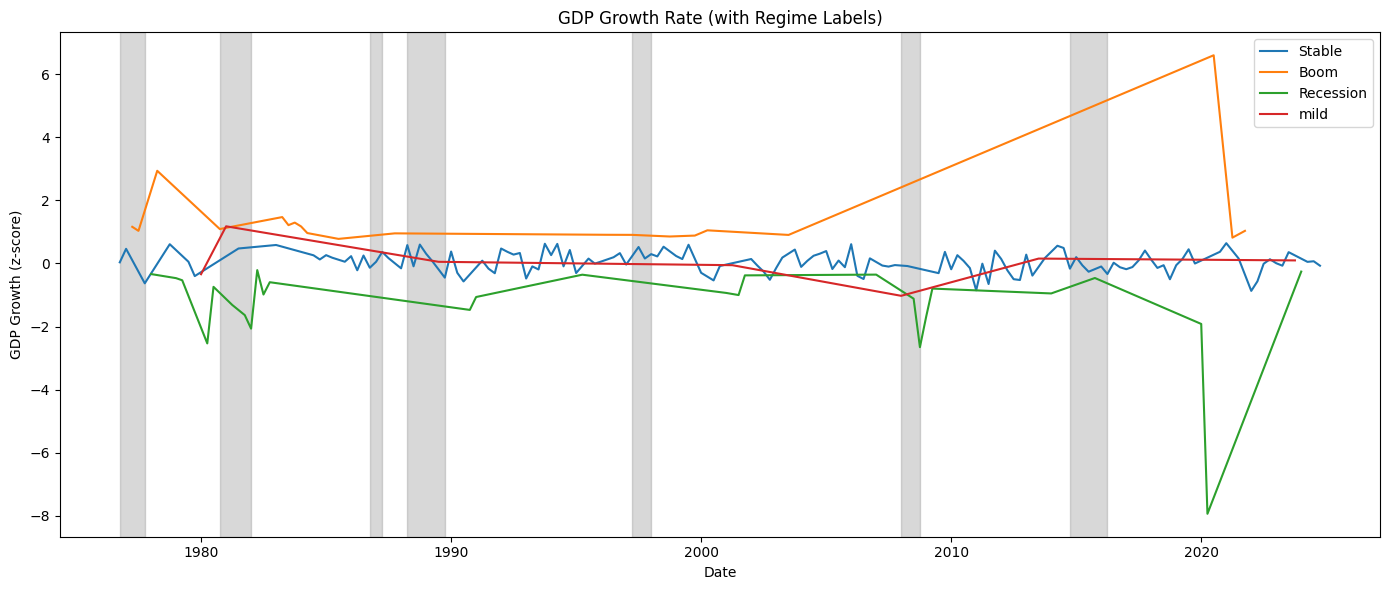

In [2341]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure datetime format
Prediction_Indicators_df['observation_date'] = pd.to_datetime(Prediction_Indicators_df['observation_date'])

# Sort by date
df = Prediction_Indicators_df.sort_values('observation_date')

# Start the plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='observation_date', y='GDP_Growth_Rate', hue='label_regime')

# Shade recession periods
recession = False
start_date = None

for i in range(len(df)):
    if NBER_df.iloc[i]['NBER_Projection'] == 1 and not recession:
        start_date = df.iloc[i]['observation_date']
        recession = True
    elif NBER_df.iloc[i]['NBER_Projection'] == 0 and recession:
        end_date = df.iloc[i]['observation_date']
        plt.axvspan(start_date, end_date, color='grey', alpha=0.3)
        recession = False

# Catch if the last period is a recession and didn’t close
if recession:
    plt.axvspan(start_date, df.iloc[-1]['observation_date'], color='grey', alpha=0.3)

plt.title('GDP Growth Rate (with Regime Labels)')
plt.xlabel('Date')
plt.ylabel('GDP Growth (z-score)')
plt.legend()
plt.tight_layout()
plt.show()

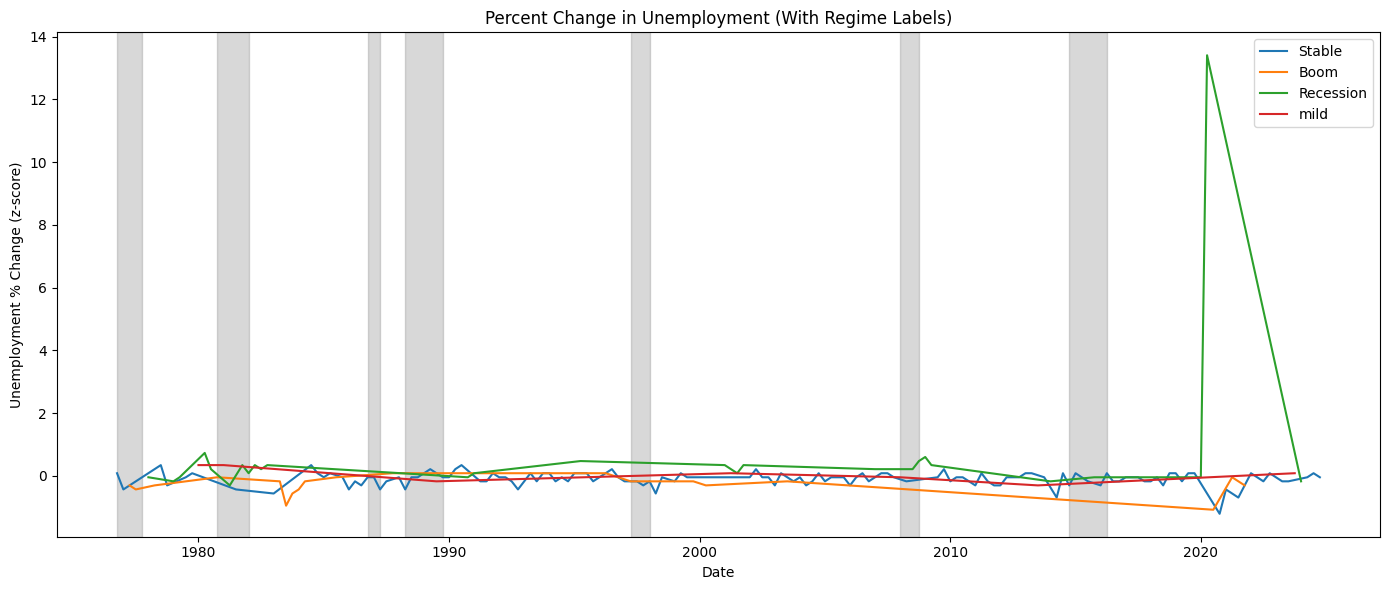

In [2342]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure datetime format
Prediction_Indicators_df['observation_date'] = pd.to_datetime(Prediction_Indicators_df['observation_date'])

# Sort by date
df = Prediction_Indicators_df.sort_values('observation_date')

# Start the plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='observation_date', y='Unemployment_Rate_Change', hue='label_regime')

# Shade recession periods
recession = False
start_date = None

for i in range(len(df)):
    if NBER_df.iloc[i]['NBER_Projection'] == 1 and not recession:
        start_date = df.iloc[i]['observation_date']
        recession = True
    elif NBER_df.iloc[i]['NBER_Projection'] == 0 and recession:
        end_date = df.iloc[i]['observation_date']
        plt.axvspan(start_date, end_date, color='grey', alpha=0.3)
        recession = False

# Catch if the last period is a recession and didn’t close
if recession:
    plt.axvspan(start_date, df.iloc[-1]['observation_date'], color='grey', alpha=0.3)

plt.title('Percent Change in Unemployment (With Regime Labels)')
plt.xlabel('Date')
plt.ylabel('Unemployment % Change (z-score)')
plt.legend()
plt.tight_layout()
plt.show()


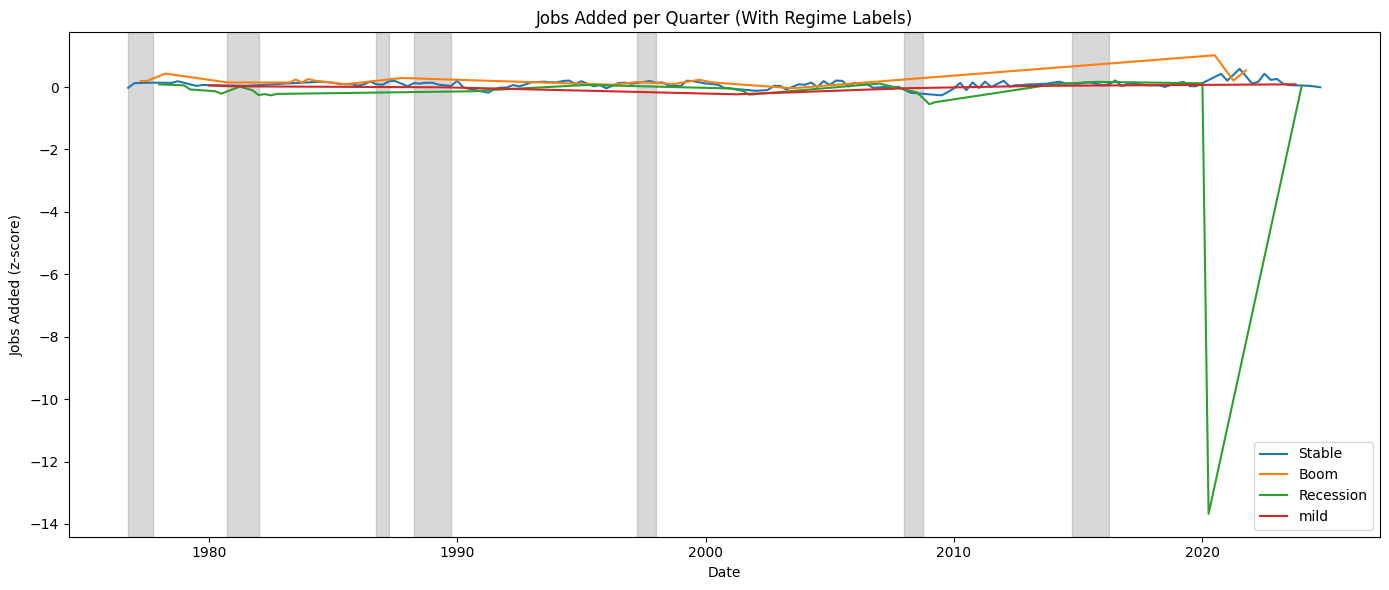

In [2343]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure datetime format
Prediction_Indicators_df['observation_date'] = pd.to_datetime(Prediction_Indicators_df['observation_date'])

# Sort by date
df = Prediction_Indicators_df.sort_values('observation_date')

# Start the plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='observation_date', y='Jobs_Added', hue='label_regime')

# Shade recession periods
recession = False
start_date = None

for i in range(len(df)):
    if NBER_df.iloc[i]['NBER_Projection'] == 1 and not recession:
        start_date = df.iloc[i]['observation_date']
        recession = True
    elif NBER_df.iloc[i]['NBER_Projection'] == 0 and recession:
        end_date = df.iloc[i]['observation_date']
        plt.axvspan(start_date, end_date, color='grey', alpha=0.3)
        recession = False

# Catch if the last period is a recession and didn’t close
if recession:
    plt.axvspan(start_date, df.iloc[-1]['observation_date'], color='grey', alpha=0.3)

plt.title('Jobs Added per Quarter (With Regime Labels)')
plt.xlabel('Date')
plt.ylabel('Jobs Added (z-score)')
plt.legend()
plt.tight_layout()
plt.show()

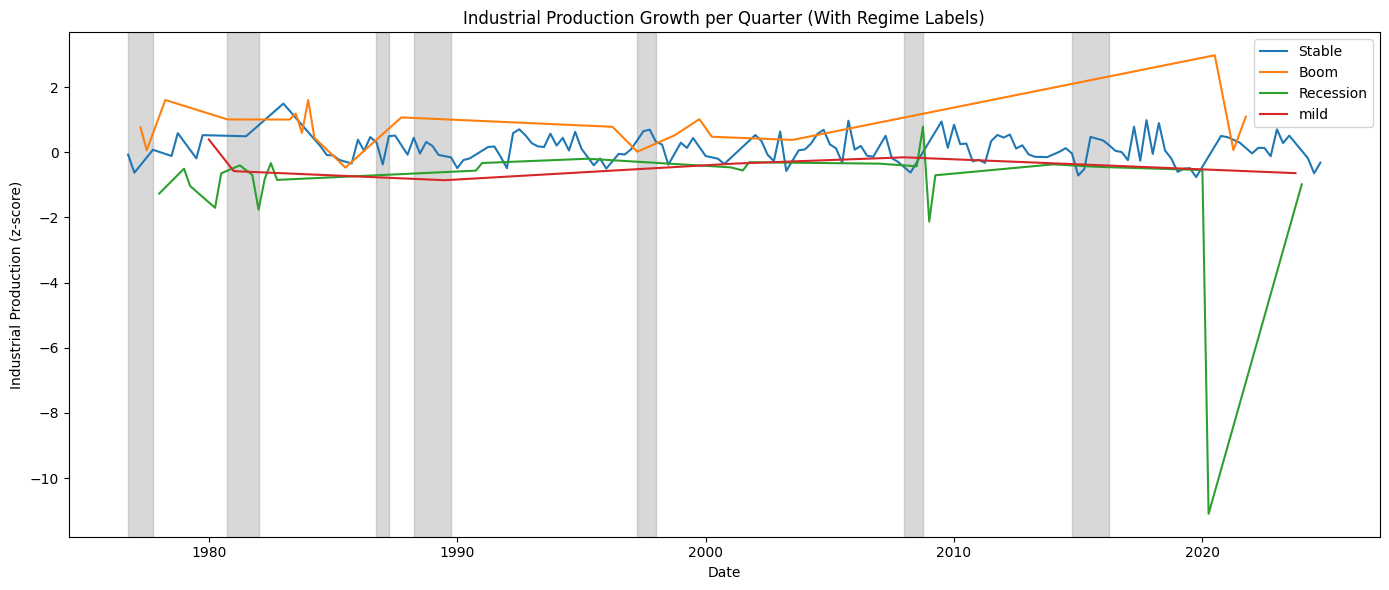

In [2344]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure datetime format
Prediction_Indicators_df['observation_date'] = pd.to_datetime(Prediction_Indicators_df['observation_date'])

# Sort by date
df = Prediction_Indicators_df.sort_values('observation_date')

# Start the plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='observation_date', y='Industrial_Production_Growth', hue='label_regime')

# Shade recession periods
recession = False
start_date = None

for i in range(len(df)):
    if NBER_df.iloc[i]['NBER_Projection'] == 1 and not recession:
        start_date = df.iloc[i]['observation_date']
        recession = True
    elif NBER_df.iloc[i]['NBER_Projection'] == 0 and recession:
        end_date = df.iloc[i]['observation_date']
        plt.axvspan(start_date, end_date, color='grey', alpha=0.3)
        recession = False

# Catch if the last period is a recession and didn’t close
if recession:
    plt.axvspan(start_date, df.iloc[-1]['observation_date'], color='grey', alpha=0.3)

plt.title('Industrial Production Growth per Quarter (With Regime Labels)')
plt.xlabel('Date')
plt.ylabel('Industrial Production (z-score)')
plt.legend()
plt.tight_layout()
plt.show()


| Regime     | Separation in PCA | Implication                            |
|------------|-------------------|----------------------------------------|
| Recession  | High              | Easy for models to learn               |
| Boom       | Moderate–High     | Also distinct                          |
| Stable     | Medium            | Some overlap with Mild                 |
| Mild       | Low               | Hardest to distinguish, needs lags/rolls |

<Axes: xlabel='PC1', ylabel='PC2'>

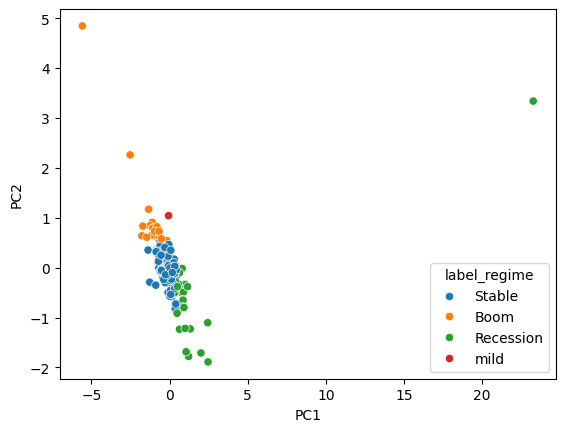

In [2345]:
from sklearn.decomposition import PCA

X = Prediction_Indicators_df[features]
pca = PCA(n_components=2)
Prediction_Indicators_df[['PC1', 'PC2']] = pca.fit_transform(X)

sns.scatterplot(data=Prediction_Indicators_df, x='PC1', y='PC2', hue='label_regime')


## **EDA+Feature Engineeing**

In [2346]:
import pandas as pd
import sqlite3

def drop_duplicate_columns(df):
    return df.loc[:, ~df.columns.duplicated()]
    
Lagging_Indicators_df = drop_duplicate_columns(Lagging_Indicators_df)
Leading_Indicators_df = drop_duplicate_columns(Leading_Indicators_df)
Coincident_Indicators_df = drop_duplicate_columns(Coincident_Indicators_df)


conn = sqlite3.connect(':memory:')

Lagging_Indicators_df.to_sql('Lagging', conn, index=False, if_exists='replace')
Leading_Indicators_df.to_sql('Leading', conn, index=False, if_exists='replace')
Coincident_Indicators_df.to_sql('Coincident', conn, index=False, if_exists='replace')


sql_query = """
SELECT *
FROM Lagging
LEFT JOIN Leading ON Lagging.observation_date = Leading.observation_date
LEFT JOIN Coincident ON Lagging.observation_date = Coincident.observation_date
WHERE Lagging.observation_date >= '1976-10-01'
"""

# Execute the query and load results into a DataFrame
All_Indicators_df = pd.read_sql_query(sql_query, conn)

# Save the merged DataFrame to a new CSV file
csv_filename = "All_Indicators.csv"
All_Indicators_df.to_csv(csv_filename, index=False)

# Close the connection
conn.close()

# Provide the final DataFrame
All_Indicators_df

,observation_date,Interest_Rates,10Y_minus_2Y_Treasury_Constant_Maturity,Corporate_Bond_Yield,CPI,Deficit_%_GDP,Durable_Good_Orders,GDP,PPI,M2_Money_Stocks,...,Credit_Conditions_Subindex,Crude_Oil_Prices,Housing_Starts,Volatility_Index,observation_date,Capacity_Utilization_Rate,Industrial_Production_Index,Labor_Force_Participation,Total_Retail_Sales,Total_Jobs
0,1976-10-01,4.87,1.43,None,3.000,-2.917053,NaN,6451.177,3.51171,1943.0,...,-1.56955,13.90,1629,NaN,1976-10-01,80.9266,44.5600,61.6,NaN,79911.0
1,1977-01-01,4.66,1.31,None,2.900,-2.577500,NaN,6527.703,4.84140,1985.0,...,-1.73878,13.90,1527,NaN,1977-01-01,81.9391,45.4156,61.6,NaN,80690.0
2,1977-04-01,5.16,1.41,None,3.900,-2.562325,NaN,6654.466,7.09571,1999.3,...,-1.64696,13.90,1892,NaN,1977-04-01,83.8333,47.1719,62.1,NaN,81728.0
3,1977-07-01,5.82,1.06,None,3.800,-2.547150,NaN,6774.457,5.68182,2017.6,...,-1.30813,13.90,2058,NaN,1977-07-01,84.0382,47.9714,62.1,NaN,82834.0
4,1977-10-01,6.51,0.42,None,3.700,-2.531975,NaN,6774.592,5.97738,2035.7,...,-1.09820,14.85,2042,NaN,1977-10-01,83.8411,48.2839,62.4,NaN,83800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,2024-01-01,5.33,-0.26,None,9.338,-6.280020,279500.0,23053.545,-3.42816,6705.5,...,-0.01606,74.15,1376,13.71,2024-01-01,77.7036,101.4830,62.5,224062.0,157049.0
190,2024-04-01,5.33,-0.33,None,10.158,NaN,276422.0,23223.906,0.02725,6687.5,...,-0.04506,85.35,1377,13.98,2024-04-01,77.9731,102.3568,62.7,224487.0,157635.0
191,2024-07-01,5.26,-0.25,None,8.951,NaN,287427.0,23400.294,1.37333,6728.5,...,-0.03644,81.80,1262,17.07,2024-07-01,77.6310,102.5192,62.7,226699.0,158003.0
192,2024-10-01,4.65,0.12,None,7.911,NaN,282571.0,23542.349,-0.82722,6761.1,...,-0.08510,71.99,1344,17.36,2024-10-01,77.1891,102.2669,62.5,228287.0,158358.0


### **Temporal Features**
- Create 1–4 quarter lags per indicator  
- Add rolling stats (mean, % change, std dev)

---

**Why are these important?**

---

#### 🔁 **1. Lag Features (1 to 4 Quarters Behind)**

**What they are:**  
Values of indicators from 1–4 quarters ago (like `GDP_lag_1`, `Inflation_lag_2`).

**Why they matter:**
- Show **delayed effects** (e.g., unemployment rising *after* a slowdown begins).
- Add **memory** to the model (since XGBoost can't remember past values).
- Help detect **turning points** (like trends reversing over several quarters).

> 📌 *Example:* If inflation has been rising for 3 quarters, the model can see that pattern using lag features.

---

#### 📈 **2. Rolling Stats (Trends & Volatility)**

**What they are:**
- **Rolling Mean**: Average over recent quarters (smooths the noise).
- **% Change**: How much a value has increased or decreased.
- **Rolling Std Dev**: Measures how much values fluctuate (volatility).

**Why they matter:**
- Capture **momentum** (like rapid GDP growth or decline).
- Identify **instability** (e.g., wild swings in inflation or markets).
- Make raw data easier to interpret by showing patterns instead of spikes.

> 📌 *Example:* A big jump in inflation volatility might signal an upcoming recession.

---

#### 🧠 **Why These Help Predict Economic Regimes**

| Feature Type       | Helps With...                          |
|--------------------|----------------------------------------|
| Lag Features       | Spotting delays and early warning signs |
| Rolling Mean       | Seeing smooth trends                   |
| % Change           | Measuring momentum                     |
| Rolling Std Dev    | Sensing instability or uncertainty     |

---

Let me know if you want code to automatically add these to your dataset!

---

In [2347]:
import pandas as pd
# Drop duplicate columns based on column name
All_Indicators_df = All_Indicators_df.loc[:, ~All_Indicators_df.columns.duplicated()]
Prediction_Indicators_df = Prediction_Indicators_df.loc[:, ~Prediction_Indicators_df.columns.duplicated()]


# Ensure Date is datetime and sorted
All_Indicators_df.loc[:, 'observation_date'] = pd.to_datetime(All_Indicators_df['observation_date'])
All_Indicators_df = All_Indicators_df.sort_values('observation_date')
All_Indicators_df = All_Indicators_df.set_index('observation_date')

# Example indicators
indicators = ['CPI', 'M2_Money_Stocks', 'Jobless_Claims', 'Business_Confidence_Index', 'Consumer_Confidence_Index', 'Credit_Conditions_Subindex', 'Housing_Starts', 'Labor_Force_Participation', 'Interest_Rates', 'Deficit_%_GDP', 'Capacity_Utilization_Rate']  # modify to match your real column names

# 1. Add 1–4 quarter lags
for col in indicators:
    for lag in range(1, 5):
        All_Indicators_df[f'{col}_lag{lag}'] = All_Indicators_df[col].shift(lag)

window = 4
for col in indicators:
    All_Indicators_df[f'{col}_roll_mean'] = All_Indicators_df[col].rolling(window).mean()
    All_Indicators_df[f'{col}_roll_std'] = All_Indicators_df[col].rolling(window).std()
    All_Indicators_df[f'{col}_pct_change'] = All_Indicators_df[col].pct_change(periods=window)

new_cols = [col for col in All_Indicators_df.columns if any(suffix in col for suffix in ['_lag', '_roll_mean', '_roll_std', '_pct_change'])]
All_Indicators_df[new_cols]

Lags_df = pd.read_csv('Lags.csv')

Lags_df


,observation_date,CPI_lag1,CPI_lag2,CPI_lag3,CPI_lag4,M2_Money_Stocks_lag1,M2_Money_Stocks_lag2,M2_Money_Stocks_lag3,M2_Money_Stocks_lag4,Jobless_Claims_lag1,...,Labor_Force_Participation_pct_change,Interest_Rates_roll_mean,Interest_Rates_roll_std,Interest_Rates_pct_change,Deficit_%_GDP_roll_mean,Deficit_%_GDP_roll_std,Deficit_%_GDP_pct_change,Capacity_Utilization_Rate_roll_mean,Capacity_Utilization_Rate_roll_std,Capacity_Utilization_Rate_pct_change
0,1976-10-01,3.000,3.100,3.500,NaN,1905.8,1890.9,1839.8,NaN,395231.0,...,NaN,5.0450,0.228108,NaN,-3.426381,0.438360,NaN,79.857225,0.839189,NaN
1,1977-01-01,3.000,3.000,3.100,3.500,1943.0,1905.8,1890.9,1839.8,392154.0,...,0.004894,5.0025,0.289180,-0.035197,-3.086829,0.438360,-0.345099,80.602350,1.067480,0.037748
2,1977-04-01,2.900,3.000,3.000,3.100,1985.0,1943.0,1905.8,1890.9,404077.0,...,0.008117,4.9925,0.280639,-0.007692,-2.828371,0.329123,-0.287483,81.685500,1.627994,0.054498
3,1977-07-01,3.900,2.900,3.000,3.000,1999.3,1985.0,1943.0,1905.8,369462.0,...,0.004854,5.1275,0.505132,0.102273,-2.651007,0.177796,-0.217851,82.684300,1.505333,0.049913
4,1977-10-01,3.800,3.900,2.900,3.000,2017.6,1999.3,1985.0,1943.0,365462.0,...,0.012987,5.5375,0.803757,0.336756,-2.554737,0.019591,-0.132009,83.412925,0.987113,0.036014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,2024-01-01,9.674,9.675,14.276,17.914,6724.2,6819.2,6844.8,7057.6,211538.0,...,0.001603,5.2275,0.161735,0.181818,-6.218299,0.053121,0.026914,78.509725,0.649037,-0.023820
190,2024-04-01,9.338,9.674,9.675,14.276,6705.5,6724.2,6819.2,6844.8,212154.0,...,0.001597,5.3125,0.035000,0.068136,NaN,NaN,0.020051,78.220950,0.527775,-0.014598
191,2024-07-01,10.158,9.338,9.674,9.675,6687.5,6705.5,6724.2,6819.2,223615.0,...,0.001597,5.3125,0.035000,0.000000,NaN,NaN,0.013278,77.896075,0.293282,-0.016464
192,2024-10-01,8.951,10.158,9.338,9.674,6728.5,6687.5,6705.5,6724.2,230769.0,...,-0.003190,5.1425,0.329987,-0.127580,NaN,NaN,0.006595,77.624200,0.325266,-0.013893


## Derived features

| Feature | Formula |
|--------|---------|
| **Fiscal Stress Index** | Deficit % GDP × Interest Rate |
| **Inflation Gap** | PPI – CPI |
| **Jobs Momentum** | ΔJobs / ΔUnemployment |
| **Inventory Ratio** | Inventories ÷ Retail Sales |
| **Volatility Shock** | QoQ % Change in VIX |
| **Liquidity Shock** | ΔReal M2 QoQ |
| **Treasury Maturity Shock** | ΔTreasury QoQ |

In [2348]:
import pandas as pd
import numpy as np
import sqlite3

# Load required datasets
Deficit_GDP_df = pd.read_csv('Lagging/Deficit_of_GDP.csv')
Interest_Rates_df = pd.read_csv('Lagging/Interest_Rates.csv')
CPI_Inflation_df = pd.read_csv('Lagging/CPI_Inflation_Rate.csv')
PPI_Inflation_df = pd.read_csv('Lagging/PPI_Inflation_Rate.csv')
Total_Jobs_Added_df = pd.read_csv('Prediction_Indicators.csv')
Unemployment_Rate_Change_df = pd.read_csv('Prediction_Indicators.csv')
Business_Inventories_df = pd.read_csv('Lagging/Total_Business_Inventories.csv')
Retail_Sales_df = pd.read_csv('Coincident/Retail_Sales.csv')
Volatility_Index_df = pd.read_csv('Leading/Volatility_Index.csv')
Real_M2_Stocks_df = pd.read_csv('Lagging/Real_M2_Stocks.csv')
Treasury_Maturity_df = pd.read_csv('Lagging/10Y_2Y_Treasury_Constant_Maturity.csv')

# -----------------------------------------------------
# Fiscal Stress Index
conn = sqlite3.connect(':memory:')
Deficit_GDP_df.to_sql('DeficitGDP', conn, index=False, if_exists='replace')
Interest_Rates_df.to_sql('InterestRates', conn, index=False, if_exists='replace')

sql_query = """
SELECT InterestRates.observation_date, InterestRates.Interest_Rates, DeficitGDP."Deficit_%_GDP"
FROM InterestRates
LEFT JOIN DeficitGDP ON InterestRates.observation_date = DeficitGDP.observation_date
WHERE InterestRates.observation_date >= '1976-10-01'
"""
Fisical_Stress_Index_df = pd.read_sql_query(sql_query, conn)
Fisical_Stress_Index_df['Fisical_Stress_Index'] = (
    Fisical_Stress_Index_df['Deficit_%_GDP'] * Fisical_Stress_Index_df['Interest_Rates']
)
conn.close()

# -----------------------------------------------------
# Inflation Gap
conn = sqlite3.connect(':memory:')
CPI_Inflation_df.to_sql('CPI', conn, index=False, if_exists='replace')
PPI_Inflation_df.to_sql('PPI', conn, index=False, if_exists='replace')

sql_query = """
SELECT CPI.observation_date, CPI.CPI, PPI.PPI
FROM CPI
LEFT JOIN PPI ON CPI.observation_date = PPI.observation_date
WHERE CPI.observation_date >= '1970-01-01'
"""
Inflation_Gap_df = pd.read_sql_query(sql_query, conn)
Inflation_Gap_df['Inflation_Gap'] = Inflation_Gap_df['PPI'] - Inflation_Gap_df['CPI']
conn.close()

# -----------------------------------------------------
# Jobs Momentum (with division-by-zero guard)
conn = sqlite3.connect(':memory:')
Total_Jobs_Added_df.to_sql('Jobs', conn, index=False, if_exists='replace')
Unemployment_Rate_Change_df.to_sql('Unemployment', conn, index=False, if_exists='replace')

sql_query = """
SELECT Jobs.observation_date, Jobs.Jobs_Added, Unemployment.Unemployment_Rate_Change
FROM Jobs
LEFT JOIN Unemployment ON Jobs.observation_date = Unemployment.observation_date
WHERE Jobs.observation_date >= '1970-01-01'
"""
Jobs_Momentum_df = pd.read_sql_query(sql_query, conn)
Jobs_Momentum_df['Jobs_Momentum'] = np.where(
    Jobs_Momentum_df['Unemployment_Rate_Change'] == 0,
    0,
    Jobs_Momentum_df['Jobs_Added'] / Jobs_Momentum_df['Unemployment_Rate_Change']
)
conn.close()

# -----------------------------------------------------
# Inventories-to-Sales Ratio (with division-by-zero guard)
conn = sqlite3.connect(':memory:')
Business_Inventories_df.to_sql('Inventories', conn, index=False, if_exists='replace')
Retail_Sales_df.to_sql('Sales', conn, index=False, if_exists='replace')

sql_query = """
SELECT Sales.observation_date, Sales.Total_Retail_Sales, Inventories.Business_Inventories
FROM Sales
LEFT JOIN Inventories ON Sales.observation_date = Inventories.observation_date
WHERE Sales.observation_date >= '1992-01-01'
"""
Inventories_to_Sales_Ratio_df = pd.read_sql_query(sql_query, conn)
Inventories_to_Sales_Ratio_df['Inventories_to_Sales_Ratio'] = np.where(
    Inventories_to_Sales_Ratio_df['Total_Retail_Sales'] == 0,
    0,
    Inventories_to_Sales_Ratio_df['Business_Inventories'] / Inventories_to_Sales_Ratio_df['Total_Retail_Sales']
)
conn.close()
# -----------------------------------------------------
# Volatility Shock
Volatility_Index_df['Volatility_Index_Growth_Rate'] = Volatility_Index_df[
    'Volatility_Index'
].pct_change() * 100

# -----------------------------------------------------
# Liquidity Shock
Real_M2_Stocks_df['M2_Money_Stocks_Change'] = Real_M2_Stocks_df[
    'M2_Money_Stocks'
].diff().round(2)

# -----------------------------------------------------
# Treasury Shock
Treasury_Maturity_df['Change_in_Treasury_Rate'] = Treasury_Maturity_df[
    '10Y_minus_2Y_Treasury_Constant_Maturity'
].diff().round(2)

# Now combine all derived indicators on observation_date
combined_df = Fisical_Stress_Index_df[['observation_date', 'Fisical_Stress_Index']] \
    .merge(Inflation_Gap_df[['observation_date', 'Inflation_Gap']], on='observation_date', how='inner') \
    .merge(Jobs_Momentum_df[['observation_date', 'Jobs_Momentum']], on='observation_date', how='inner') \
    .merge(Real_M2_Stocks_df[['observation_date', 'M2_Money_Stocks_Change']], on='observation_date', how='inner') \
    .merge(Treasury_Maturity_df[['observation_date', 'Change_in_Treasury_Rate']], on='observation_date', how='inner')

combined_df


,observation_date,Fisical_Stress_Index,Inflation_Gap,Jobs_Momentum,M2_Money_Stocks_Change,Change_in_Treasury_Rate
0,1976-10-01,-14.206046,0.51171,190.000000,14.5,0.25
1,1977-01-01,-12.011150,1.94140,-806.666667,12.4,-0.18
2,1977-04-01,-13.221597,3.19571,-1685.000000,5.2,0.04
3,1977-07-01,-14.824413,1.88182,-1153.333333,4.7,-0.09
4,1977-10-01,-16.483157,2.27738,0.000000,2.7,-0.21
...,...,...,...,...,...,...
188,2023-10-01,-33.253190,-13.39729,1860.000000,-16.8,0.37
189,2024-01-01,-33.472507,-12.76616,-1190.000000,0.3,0.18
190,2024-04-01,NaN,-10.13075,0.000000,-9.4,0.05
191,2024-07-01,NaN,-7.57767,880.000000,1.1,0.18


## Modeling

In [2349]:
import pandas as pd

# Load the three datasets
lags_df = pd.read_csv('lags.csv')
combined_df = pd.read_csv('Combined_df.csv')
prediction_df = pd.read_csv('Regime_Lables.csv')

# Display the first few rows and column names to understand how to merge
# Merge the three datasets on 'observation_date'
merged_df = pd.merge(lags_df, combined_df, on='observation_date', how='outer')
merged_df = pd.merge(merged_df, prediction_df, on='observation_date', how='outer')

# Drop duplicate rows based on all columns
merged_df = merged_df.drop_duplicates()

# Display the shape and a preview
merged_df.shape, merged_df.head()


merged_df

,observation_date,CPI_lag1,CPI_lag2,CPI_lag3,CPI_lag4,M2_Money_Stocks_lag1,M2_Money_Stocks_lag2,M2_Money_Stocks_lag3,M2_Money_Stocks_lag4,Jobless_Claims_lag1,...,Fisical_Stress_Index,Inflation_Gap,Jobs_Momentum,M2_Money_Stocks_Change,Change_in_Treasury_Rate,GDP_Growth_Rate,Unemployment_Rate_Change,Jobs_Added,Industrial_Production_Growth,Regime_Label
0,1976-10-01,3.000,3.100,3.500,NaN,1905.8,1890.9,1839.8,NaN,395231.0,...,-14.206046,0.51171,190.000000,14.5,0.25,0.722604,0.1,19.0,-0.024904,Stable
1,1977-01-01,3.000,3.000,3.100,3.500,1943.0,1905.8,1890.9,1839.8,392154.0,...,-12.011150,1.94140,-806.666667,12.4,-0.18,1.186233,-0.3,242.0,-0.689685,mild
2,1977-04-01,2.900,3.000,3.000,3.100,1985.0,1943.0,1905.8,1890.9,404077.0,...,-13.221597,3.19571,-1685.000000,5.2,0.04,1.941924,-0.2,337.0,0.976329,Boom
3,1977-07-01,3.900,2.900,3.000,3.000,1999.3,1985.0,1943.0,1905.8,369462.0,...,-14.824413,1.88182,-1153.333333,4.7,-0.09,1.803165,-0.3,346.0,0.135890,Boom
4,1977-10-01,3.800,3.900,2.900,3.000,2017.6,1999.3,1985.0,1943.0,365462.0,...,-16.483157,2.27738,0.000000,2.7,-0.21,0.001993,0.0,268.0,0.153911,Stable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,2024-01-01,9.674,9.675,14.276,17.914,6724.2,6819.2,6844.8,7057.6,211538.0,...,-33.472507,-12.76616,-1190.000000,0.3,0.18,0.404802,-0.1,119.0,-1.118474,Recession
190,2024-04-01,9.338,9.674,9.675,14.276,6705.5,6724.2,6819.2,6844.8,212154.0,...,NaN,-10.13075,0.000000,-9.4,0.05,0.738980,0.0,118.0,-0.157825,Stable
191,2024-07-01,10.158,9.338,9.674,9.675,6687.5,6705.5,6724.2,6819.2,223615.0,...,NaN,-7.57767,880.000000,1.1,0.18,0.759510,0.1,88.0,-0.711066,mild
192,2024-10-01,8.951,10.158,9.338,9.674,6728.5,6687.5,6705.5,6724.2,230769.0,...,NaN,-8.73822,0.000000,4.8,0.02,0.607065,0.0,44.0,-0.320190,mild


In [2350]:
# ================================
# 📦 Imports
# ================================
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from xgboost import XGBClassifier

# ================================
# 📥 Load and Clean Dataset
# ================================
df = pd.read_csv("All_for_Modeling.csv")

# ✅ Keep "Boom" as a distinct class (no merging)
# df["Regime_Label"] = df["Regime_Label"].replace("Boom", "Stable")  ← this was intentionally removed

# Select numeric features, drop date column if exists
X = df.select_dtypes(include=['number']).drop(columns=["observation_date"], errors='ignore')

# Replace infinite values and impute missing ones
X.replace([np.inf, -np.inf], np.nan, inplace=True)
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Filter target values to match cleaned features
y = df["Regime_Label"].loc[X_imputed.index]
mask = y.notna()
X_imputed = X_imputed.loc[mask]
y = y.loc[mask]

# ================================
# 🔄 Encode Target and Balance Classes
# ================================
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_encoded), y=y_encoded)
class_weight_dict = {i: w for i, w in enumerate(class_weights)}

# ================================
# 📊 Train/Test Split
# ================================
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y_encoded, stratify=y_encoded, test_size=0.2, random_state=42
)

# ================================
# 🤖 Initial XGBoost Model Setup
# ================================
baseline_model = XGBClassifier(
    max_depth=12,
    min_child_weight=2,
    gamma=2,
    subsample=0.7,
    colsample_bytree=0.9,
    n_estimators=150,
    learning_rate=0.2,
    objective='multi:softprob',
    eval_metric='mlogloss',
    random_state=42
)


# Train the baseline model
baseline_model.fit(X_train, y_train)

# Make predictions
y_pred = baseline_model.predict(X_test)

In [2351]:
# Classification report
report = classification_report(
    y_test, y_pred,
    labels=list(range(len(le.classes_))),
    target_names=le.classes_,
    zero_division=0,
    output_dict=True
)
report_df = pd.DataFrame(report).transpose().round(3)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=list(range(len(le.classes_))))

# Print results
print("\n Classification Report:")
print(report_df)

print("\n Confusion Matrix:")
print(cm)


 Classification Report:
              precision  recall  f1-score  support
Boom              0.800   1.000     0.889    4.000
Recession         0.800   0.800     0.800    5.000
Stable            0.857   0.947     0.900   19.000
mild              0.750   0.545     0.632   11.000
accuracy          0.821   0.821     0.821    0.821
macro avg         0.802   0.823     0.805   39.000
weighted avg      0.814   0.821     0.810   39.000

 Confusion Matrix:
[[ 4  0  0  0]
 [ 0  4  0  1]
 [ 0  0 18  1]
 [ 1  1  3  6]]


In [2352]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to training data only
sm = SMOTE(random_state=42)

X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

# Optional: Check new class distribution
from collections import Counter
print("After SMOTE:", Counter(y_train_smote))


After SMOTE: Counter({0: 74, 2: 74, 3: 74, 1: 74})


In [2353]:
# Train the model on SMOTE-balanced data
baseline_model.fit(X_train_smote, y_train_smote)

# Predict again
y_pred = baseline_model.predict(X_test)

# Evaluate
print("\nUpdated Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

print("\nUpdated Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Updated Classification Report:
              precision    recall  f1-score   support

        Boom       0.80      1.00      0.89         4
   Recession       1.00      1.00      1.00         5
      Stable       0.82      0.95      0.88        19
        mild       0.86      0.55      0.67        11

    accuracy                           0.85        39
   macro avg       0.87      0.87      0.86        39
weighted avg       0.85      0.85      0.84        39


Updated Confusion Matrix:
[[ 4  0  0  0]
 [ 0  5  0  0]
 [ 0  0 18  1]
 [ 1  0  4  6]]


### GridSearchCV

In [2354]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for tuning
param_grid = {
    'max_depth': [6, 8, 10],
    'min_child_weight': [1, 2, 4],
    'gamma': [0, 1, 2],
    'subsample': [0.6, 0.7, 0.8],
    'colsample_bytree': [0.6, 0.7, 0.8],
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.2]
}

# XGBoost model
xgb = XGBClassifier(
    objective='multi:softprob',
    eval_metric='mlogloss',
    random_state=42
)

# GridSearch with 3-fold cross-validation
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='f1_weighted',
    cv=3,
    verbose=3,
    n_jobs=-4
)

# Fit model
grid_search.fit(X_train, y_train)

# Best estimator and params
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Predict with tuned model
y_pred = best_model.predict(X_test)

# Evaluation
report = classification_report(
    y_test, y_pred,
    labels=list(range(len(le.classes_))),
    target_names=le.classes_,
    zero_division=0,
    output_dict=True
)
report_df = pd.DataFrame(report).transpose().round(3)

cm = confusion_matrix(y_test, y_pred, labels=list(range(len(le.classes_))))

print("\n Classification Report:")
print(report_df)

print("\n Confusion Matrix:")
print(cm)



Fitting 3 folds for each of 972 candidates, totalling 2916 fits
Best Parameters: {'colsample_bytree': 0.7, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 2, 'n_estimators': 100, 'subsample': 0.7}

 Classification Report:
              precision  recall  f1-score  support
Boom              0.800   1.000     0.889    4.000
Recession         0.800   0.800     0.800    5.000
Stable            0.857   0.947     0.900   19.000
mild              0.750   0.545     0.632   11.000
accuracy          0.821   0.821     0.821    0.821
macro avg         0.802   0.823     0.805   39.000
weighted avg      0.814   0.821     0.810   39.000

 Confusion Matrix:
[[ 4  0  0  0]
 [ 0  4  0  1]
 [ 0  0 18  1]
 [ 1  1  3  6]]


### SHAP Analysis


**In Simple Terms**
**Each dot** = one sample (row in your test set) for a specific feature.

**Y-axis** = Features, ranked by importance (most impactful at the top).

**X-axis (SHAP value)** = How much that feature pushed the prediction:
- Right of center = pushed prediction toward the class
- Left of center = pushed prediction away from the class

**Color** = Feature value (🔴 high, 🔵 low)


🔎 SHAP Summary for class: Boom


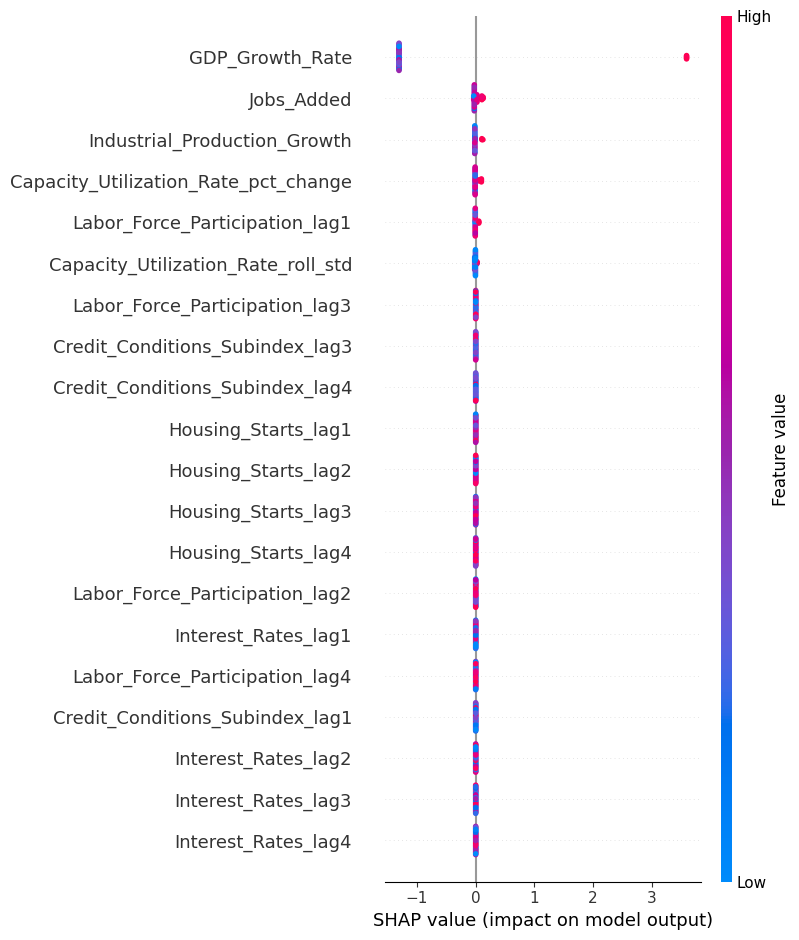


🔎 SHAP Summary for class: Recession


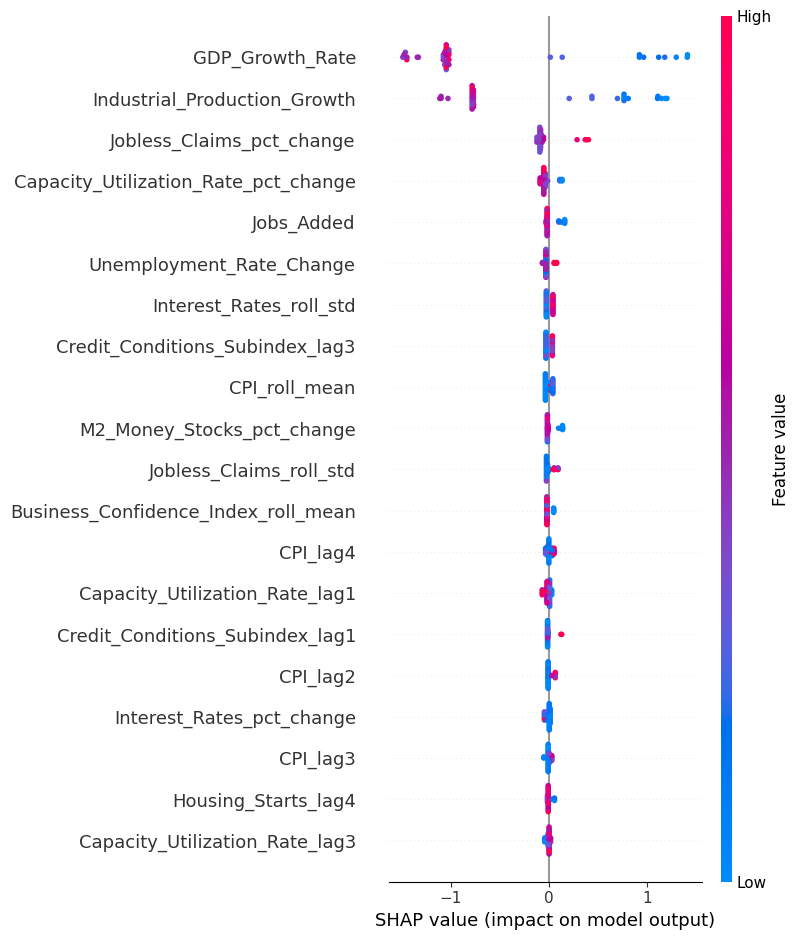


🔎 SHAP Summary for class: Stable


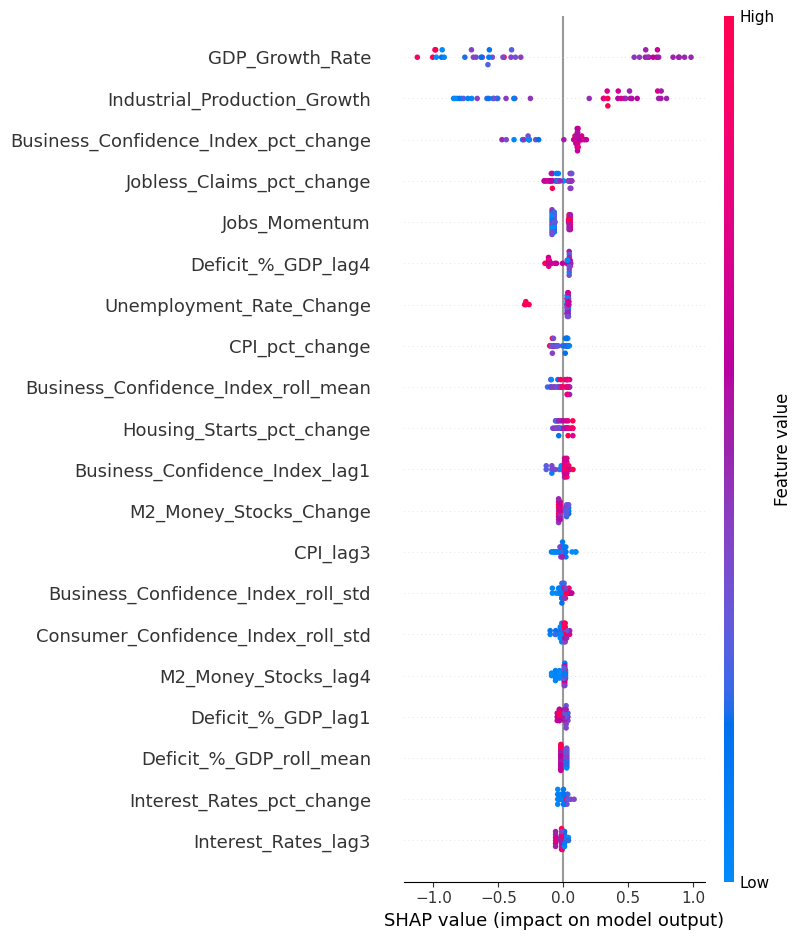


🔎 SHAP Summary for class: mild


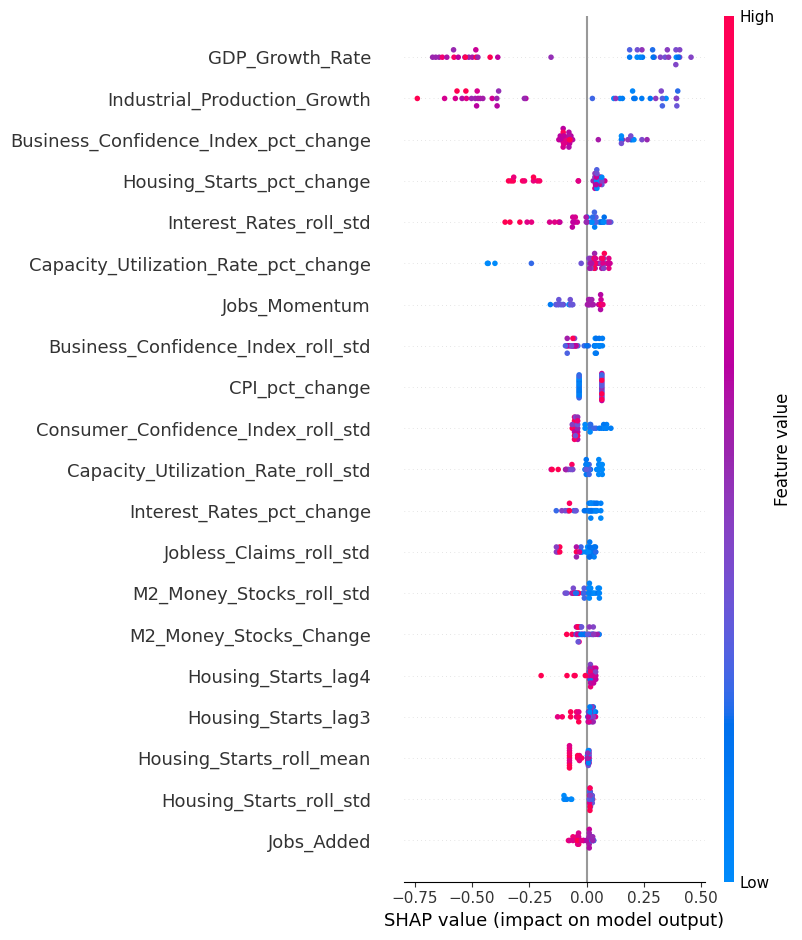

In [2355]:
import shap
import matplotlib.pyplot as plt

# Create TreeExplainer (best for tree-based models like XGBoost)
explainer = shap.TreeExplainer(best_model)

# Compute SHAP values (returns a list of arrays, one per class)
shap_values = explainer.shap_values(X_test)

# Loop through each class and plot SHAP summary
for i, class_name in enumerate(le.classes_):
    print(f"\n🔎 SHAP Summary for class: {class_name}")
    shap.summary_plot(shap_values[i], X_test, plot_type="dot", show=True)


Its not bad, just got one slightly wrong

In [2356]:
# Get class probabilities
proba = best_model.predict_proba(X_test)

# Convert to DataFrame with class names
proba_df = pd.DataFrame(proba, columns=le.classes_)

# Add predicted and actual class labels
proba_df["predicted"] = le.inverse_transform(best_model.predict(X_test))
proba_df["actual"] = le.inverse_transform(y_test)

# Add sample index (optional)
proba_df["index"] = proba_df.index
proba_df


,Boom,Recession,Stable,mild,predicted,actual,index
0,0.004529,0.939719,0.016858,0.038893,Recession,Recession,0
1,0.017978,0.020784,0.429749,0.531489,mild,Stable,1
2,0.024424,0.032495,0.802486,0.140594,Stable,Stable,2
3,0.013373,0.011559,0.856103,0.118965,Stable,Stable,3
4,0.005774,0.785359,0.025917,0.182950,Recession,Recession,4
5,0.014783,0.032831,0.750344,0.202042,Stable,mild,5
6,0.017903,0.042092,0.576085,0.363920,Stable,Stable,6
7,0.029959,0.027732,0.309428,0.632882,mild,mild,7
8,0.018408,0.020437,0.785031,0.176124,Stable,mild,8
9,0.013829,0.065712,0.802938,0.117521,Stable,Stable,9


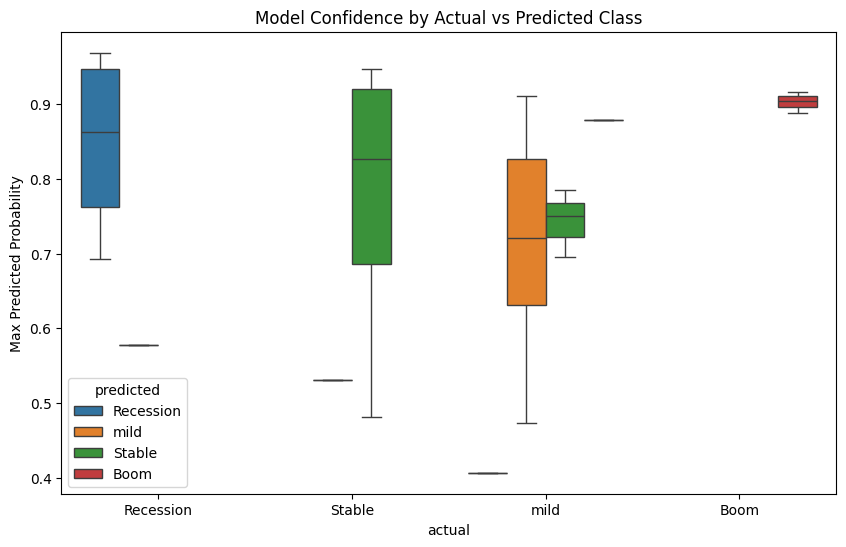

In [2357]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create max_proba before plotting
proba_df["max_proba"] = proba_df[le.classes_].max(axis=1)

# Plot predicted probability for each true class
plt.figure(figsize=(10, 6))
sns.boxplot(data=proba_df, x='actual', y='max_proba', hue='predicted')
plt.title("Model Confidence by Actual vs Predicted Class")
plt.ylabel("Max Predicted Probability")
plt.show()
